<a href="https://colab.research.google.com/github/Vikashkrishna/AML_LAB/blob/main/2348571_lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df = pd.read_csv('/content/Program_1_Dataset.csv')

In [20]:
df.head()

,Crime_Rate,Zone_proportion,Non_Retail_Acres,CHAS,NOX,Avg_rooms,AGE,Distance,RAD,Property_TaxRate,PTRATIO,B,LSTAT,MValue
0,0.06860,0.0,2.89,0,0.445,7.416,62.5,3.4952,2,276,18.0,396.90,6.19,33.2
1,0.14866,0.0,8.56,0,0.520,6.727,79.9,2.7778,5,384,20.9,394.76,9.42,27.5
2,0.11432,0.0,8.56,0,0.520,6.781,71.3,2.8561,5,384,20.9,395.58,7.67,26.5
3,0.22876,0.0,8.56,0,0.520,6.405,85.4,2.7147,5,384,20.9,70.80,10.63,18.6
4,0.21161,0.0,8.56,0,0.520,6.137,87.4,2.7147,5,384,20.9,394.47,13.44,19.3


In [69]:
df.describe()

,Crime_Rate,Zone_proportion,Non_Retail_Acres,CHAS,NOX,Avg_rooms,AGE,Distance,RAD,Property_TaxRate,PTRATIO,B,LSTAT,MValue
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [70]:
df.shape

(506, 14)

In [21]:
df.isnull().sum()

Crime_Rate          0
Zone_proportion     0
Non_Retail_Acres    0
CHAS                0
NOX                 0
Avg_rooms           0
AGE                 0
Distance            0
RAD                 0
Property_TaxRate    0
PTRATIO             0
B                   0
LSTAT               0
MValue              0
dtype: int64

<Axes: >

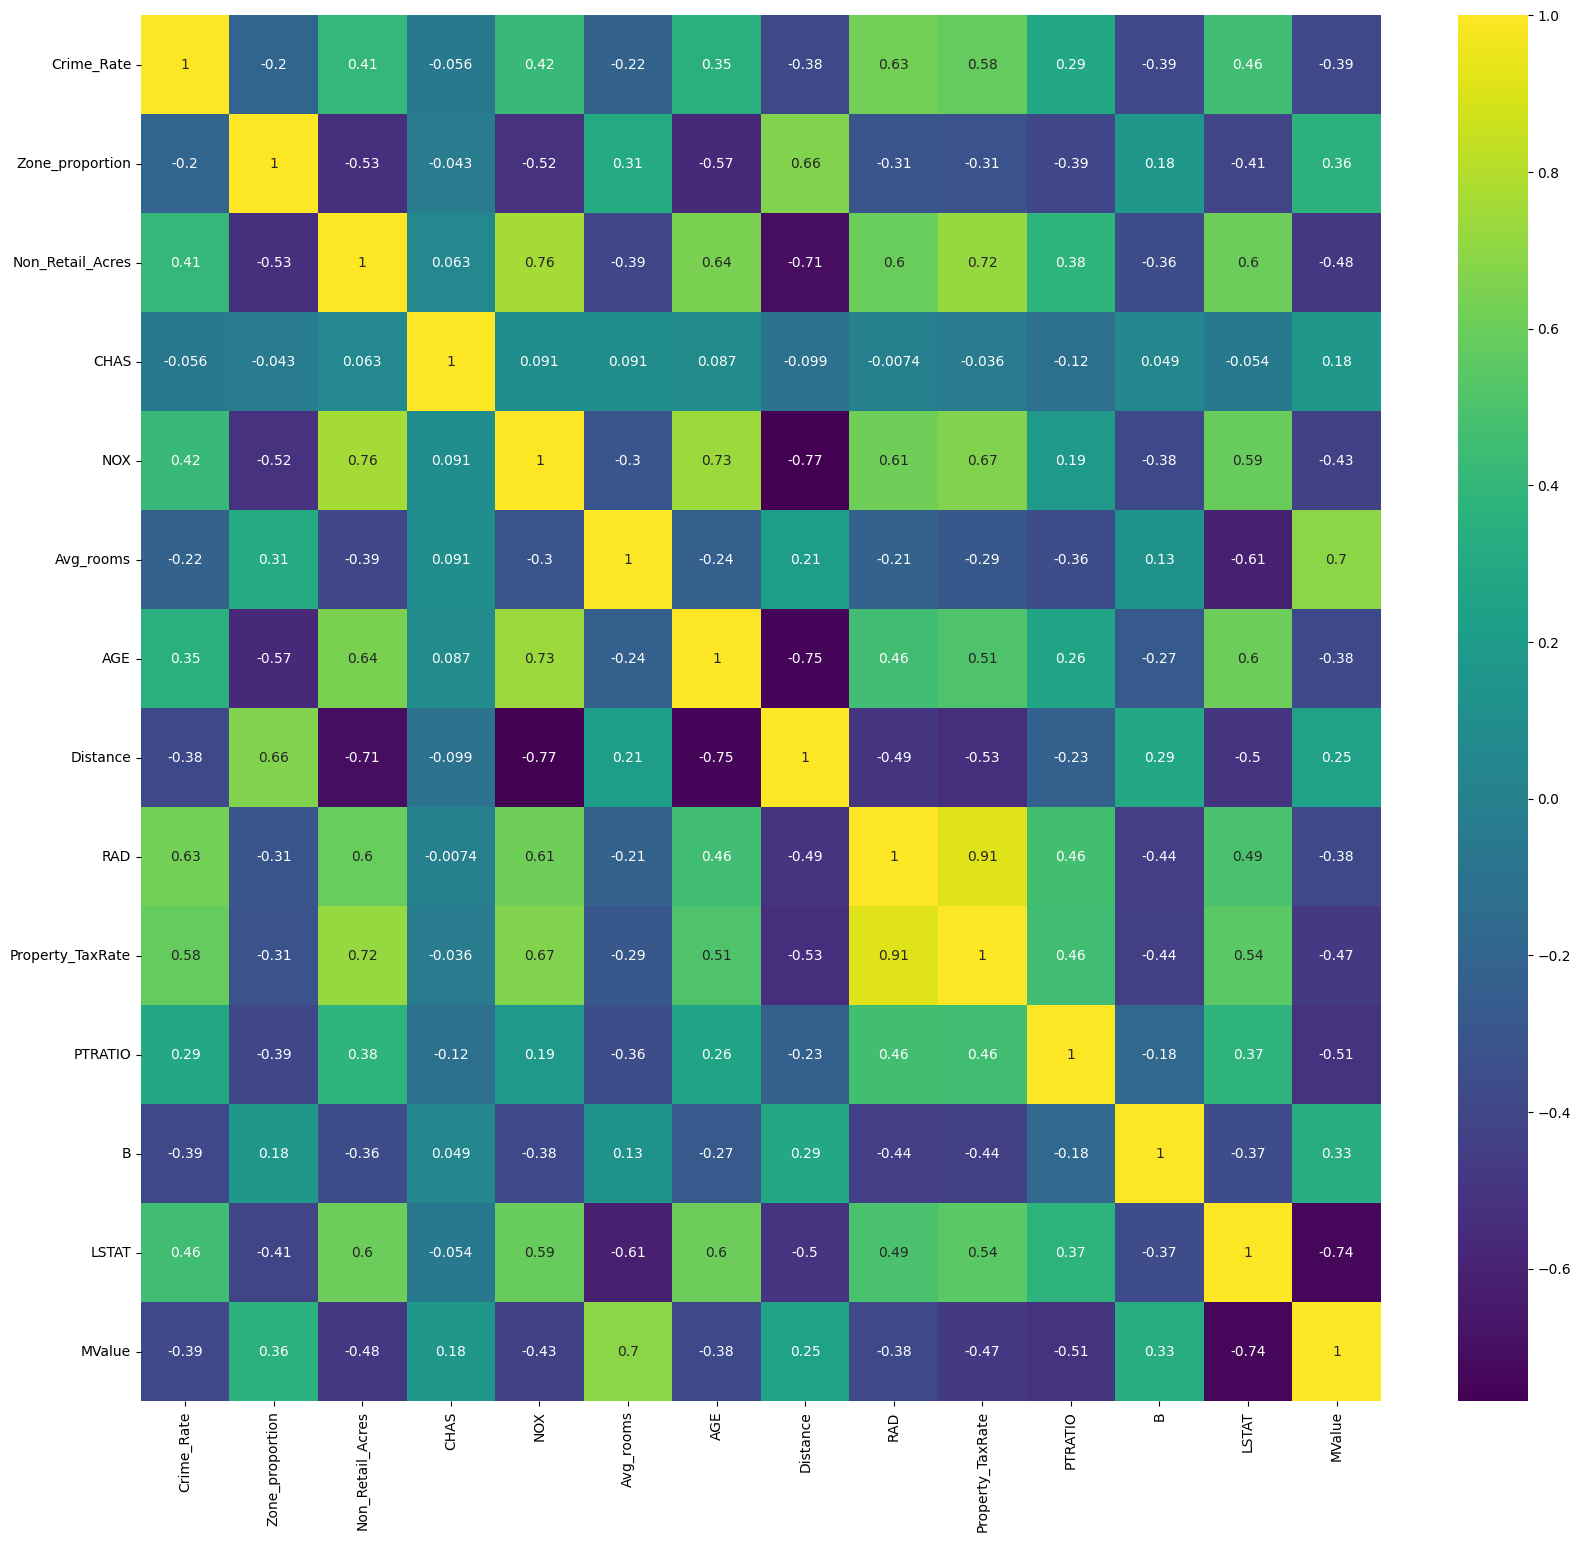

In [72]:
plt.figure(figsize = (20,18))
sns.heatmap(df.corr(), cmap = 'viridis', annot =True)

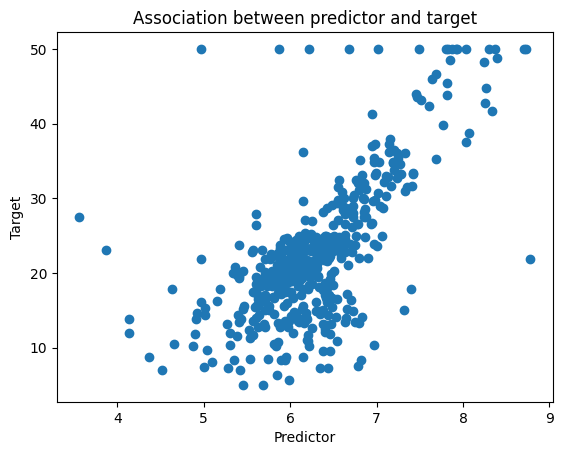

In [37]:
A=df[['Avg_rooms ']]
B=df['MValue']
plt.scatter(A,B)
plt.xlabel('Predictor')
plt.ylabel('Target')
plt.title('Association between predictor and target')
plt.show()

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(A, B, test_size=0.3, random_state = 42)

In [39]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [40]:
model.fit(X_train, Y_train)

LinearRegression()

In [41]:
y_pred = model.predict(X_test)

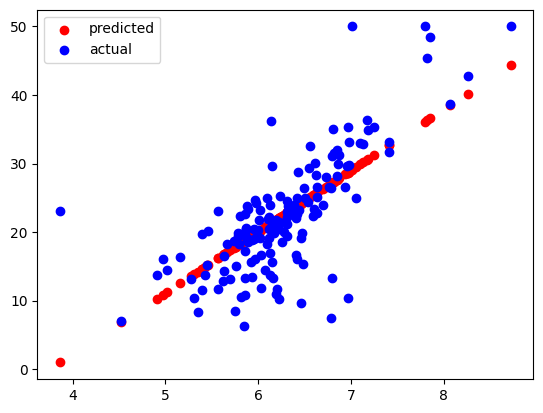

In [50]:
plt.scatter(X_test,y_pred,color='red')
plt.scatter(X_test,Y_test,color='blue')
plt.legend({'predicted','actual'})

In [55]:
df = df.rename(columns={'Avg_rooms ': 'Avg_rooms'})

In [56]:
x=df.Avg_rooms
y=df.MValue
xy=x*y
n=len(df)
xmean=df.Avg_rooms .mean()
ymean=df.MValue.mean()
numerator=xy.sum()-n*xmean*ymean
denominator=(x**2).sum()-n*(xmean**2)
m=numerator/denominator
c=ymean-(m*xmean)
print('intercept-c:',c,'coefficient-m',m)

intercept-c: -34.67062077643849 coefficient-m 9.102108981180297


In [65]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
y_pred=model.predict(X_train)
print("Mean Squared Error:\n",mean_squared_error(Y_train,y_pred))
print("R2 score is:\n",r2_score(Y_train,y_pred))

Mean Squared Error:
 47.81170547959663
R2 score is:
 0.46176397399316227


In [68]:
y_pred=model.predict(X_test)
print("Mean Squared Error:\n",mean_squared_error(Y_test,y_pred))
print("R2 score is:\n",r2_score(Y_test,y_pred))


Mean Squared Error:
 33.853804802145724
R2 score is:
 0.5424461839891813
